In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from math import ceil

                                                             3rd Machine Learning Project - start2impact - Davide Miglietta

                                                                                      NOTEBOOK 1: Exploratory Data Analysis

# Student Alcohol Consumption

This is the last project of the data science path @start2impact. The dataset can be found at: https://www.kaggle.com/uciml/student-alcohol-consumption

## Context:
The data were obtained in a survey of students math and portuguese language courses in secondary school. It contains a lot of interesting social, gender and study information about students.

## Content:
Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:

* **school** - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
* **sex** - student's sex (binary: 'F' - female or 'M' - male)
* **age** - student's age (numeric: from 15 to 22)
* **address** - student's home address type (binary: 'U' - urban or 'R' - rural)
* **famsize** - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
* **Pstatus** - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
* **Medu** - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
* **Fedu** - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
* **Mjob** - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
* **Fjob** - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
* **reason** - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
* **guardian** - student's guardian (nominal: 'mother', 'father' or 'other')
* **traveltime** - home to school travel time (numeric: 1 - 1 hour)
* **studytime** - weekly study time (numeric: 1 - 10 hours)
* **failures** - number of past class failures (numeric: n if 1<=n<3, else 4)
* **schoolsup** - extra educational support (binary: yes or no)
* **famsup** - family educational support (binary: yes or no)
* **paid** - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
* **activities** - extra-curricular activities (binary: yes or no)
* **nursery** - attended nursery school (binary: yes or no)
* **higher** - wants to take higher education (binary: yes or no)
* **internet** - Internet access at home (binary: yes or no)
* **romantic** - with a romantic relationship (binary: yes or no)
* **famrel** - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
* **freetime** - free time after school (numeric: from 1 - very low to 5 - very high)
* **goout** - going out with friends (numeric: from 1 - very low to 5 - very high)
* **Dalc** - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
* **Walc** - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
* **health** - current health status (numeric: from 1 - very bad to 5 - very good)
* **absences** - number of school absences (numeric: from 0 to 93)

### These grades are related with the course subject, Math or Portuguese:
* **G1** - first period grade (numeric: from 0 to 20)
* **G2** - second period grade (numeric: from 0 to 20)
* **G3** - final grade (numeric: from 0 to 20, output target)



## Table of contents:
1. [Datasets Exploration](#1)


2. [Features Exploration](#2)
    - [Datasets composition by school and sex](#2.1)
    - [Age distribution](#2.2)
    - [Function definition: horizontal stacked bars](#2.3)
    - [Features About Families and Parents](#2.4)
    - [Subject Related Features](#2.5)
    - [Students Related Features](#2.6)
    - [Absences Distribution](#2.7)
    
    
3. [Math and Portugues Grades](#3)
    - [Math](#3.1)
    - [Portuguese](#3.2)
    - [Common Students](#3.3)
        * [Heads up: possible mistake in the datasets](#3.3.1)
        * [Relation between math and portuguese grades](#3.3.2)


4. [Features correlated with school performances](#4)
    - [Parents education/job and grades](#4.1)
    - [(study/free) time and grades](#4.2)
    - [Support vs grades](#4.3)
    - [Alchool consumption and grades](#4.4)
    - [Features correlated with failures](#4.5)
    - [Features correlated with absences](4.6)


5. [Features correlated alchool consumption](#5)

    
6. [Conclusions](#6)

## 1

## Datasets Exploration

In [2]:
mat_stud = pd.read_csv('student-mat.csv')
print(mat_stud.shape)
mat_stud.head(2)

(395, 33)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6


In [3]:
por_stud = pd.read_csv('student-por.csv')
print(por_stud.shape)
por_stud.head(2)

(649, 33)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11


G1, G2, and G3 are renamed. G is substituted with M (math) P (portuguese) respectively.

In [4]:
m_dict = {'G1' : 'M1', 'G2' : 'M2', 'G3' : 'M3' }
p_dict = {'G1' : 'P1', 'G2' : 'P2', 'G3' : 'P3' }

mat_stud.rename(columns = m_dict, inplace = True)
por_stud.rename(columns = p_dict, inplace = True)

#mat_stud.head(2)
por_stud.head(2)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,P1,P2,P3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11


Since the two datasets appear to be very similar, the exploration is done in parallel.

In [5]:
#check presence of null values and feature types
print(mat_stud.info())
print('********************************************************')
print(por_stud.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

There are no null values in both dataset.

The numerical features are described below, while the categorical ones are separated and described apart.

In [6]:
'''NUMERICAL FEATURES
uncomment to visualize one or another dataset description'''

#mat_stud.describe()
por_stud.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,P1,P2,P3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [7]:
'''CATEGORICAL FEATURES
uncomment to visualize one or another dataframe'''

categ_mat=mat_stud.select_dtypes(include=['object'])
categ_por=por_stud.select_dtypes(include=['object'])

print(categ_mat.describe())
print('*************************************************************************************************')
print(categ_por.describe())

#categ_mat.head(2)
categ_por.head(2)

       school  sex address famsize Pstatus   Mjob   Fjob  reason guardian  \
count     395  395     395     395     395    395    395     395      395   
unique      2    2       2       2       2      5      5       4        3   
top        GP    F       U     GT3       T  other  other  course   mother   
freq      349  208     307     281     354    141    217     145      273   

       schoolsup famsup paid activities nursery higher internet romantic  
count        395    395  395        395     395    395      395      395  
unique         2      2    2          2       2      2        2        2  
top           no    yes   no        yes     yes    yes      yes       no  
freq         344    242  214        201     314    375      329      263  
*************************************************************************************************
       school  sex address famsize Pstatus   Mjob   Fjob  reason guardian  \
count     649  649     649     649     649    649    649     649

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no


## 2

## Features Exploration

With reference to the portuguese dataset, first we explore the distribution of G3 (P3) that will be the target of the Machine Learning Analysis.

The majority of grades are between 10 and 14. While it is less common having marks below 10 (meaning failure) and above 15.

[[]]

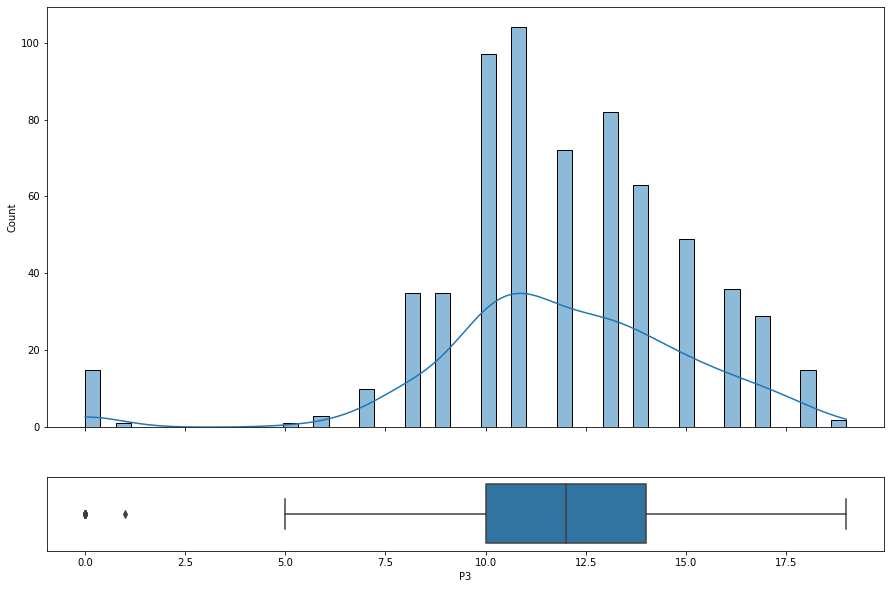

In [8]:
#setting figure and axes: 1 figure, 2 sublots sharing x axis

fig, (ax_hist, ax_box) = plt.subplots(2, sharex=True, figsize = (15,10),  
                                    gridspec_kw={"height_ratios": (.85, .15)})


sns.histplot(data = por_stud['P3'], bins=50, kde=True, ax=ax_hist)
sns.boxplot(data = por_stud['P3'], orient = 'h', ax=ax_box)

ax_hist.set( ylabel='Count')
ax_box.set(xlabel='P3')

#remove y ticks for boxplot
ax_box.set(yticks=[])

In this section various features are visualized and explored. The main goal is to discover the presence (or the absence) of particular patterns, distributions or imbalance in the data.

In [9]:
'''Those sets of colors will be used in the following plots to distinguish, coherently,
the two schools represented and male and females inside the datasets.'''

sex_colors =['red', 'green', 'maroon','green',  ]
school_colors=['blue', 'darkorange','navy','darkorange']

### 2.1

### Datasets composition by school and sex

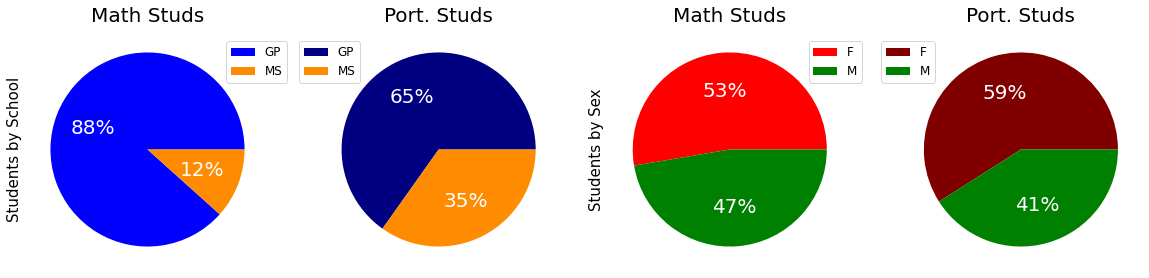

In [10]:
fig, axes =  plt.subplots(1,4, figsize = (20,10))

school_labels = mat_stud['school'].value_counts().index.tolist()
sex_labels = mat_stud['sex'].value_counts().index.tolist()


axes[0].pie(mat_stud['school'].value_counts(), labels=school_labels, colors=school_colors,
            autopct='%.0f%%', textprops={'fontsize': 20, 'color':'white'})

axes[1].pie(por_stud['school'].value_counts(), labels=school_labels, colors=school_colors[2:],
            autopct='%.0f%%', textprops={'fontsize': 20, 'color':'white'})


axes[2].pie(mat_stud['sex'].value_counts(), labels=sex_labels, colors=sex_colors,
            autopct='%.0f%%', textprops={'fontsize': 20, 'color':'white'})

axes[3].pie(por_stud['sex'].value_counts(), labels=sex_labels, colors=sex_colors[2:],
            autopct='%.0f%%', textprops={'fontsize': 20, 'color':'white'})


#set titles and legend position
for i in range(4):
    if (i == 0 or i == 2):
        axes[i].set_title('Math Studs', fontsize=20)
        axes[i].legend(bbox_to_anchor=(0.8, 0.75), loc='lower left', fontsize=12)
    else:
        axes[i].set_title('Port. Studs', fontsize=20)
        axes[i].legend(bbox_to_anchor=(-0.1, 0.75), loc='lower left', fontsize=12)

axes[0].set_ylabel('Students by School', size=15)
axes[2].set_ylabel('Students by Sex', size=15) 

plt.show()

* Students mainly come from Gabriel Pereira school
* Females are slighlty more represented in the sample

*Note that, also in the following visualizations, the couples blue/orange and red/green will be used to distinguish respectively schools and genders. The two datsets theirselves are distinguishable by different shades of the colors.*

### 2.2

### Age distribution

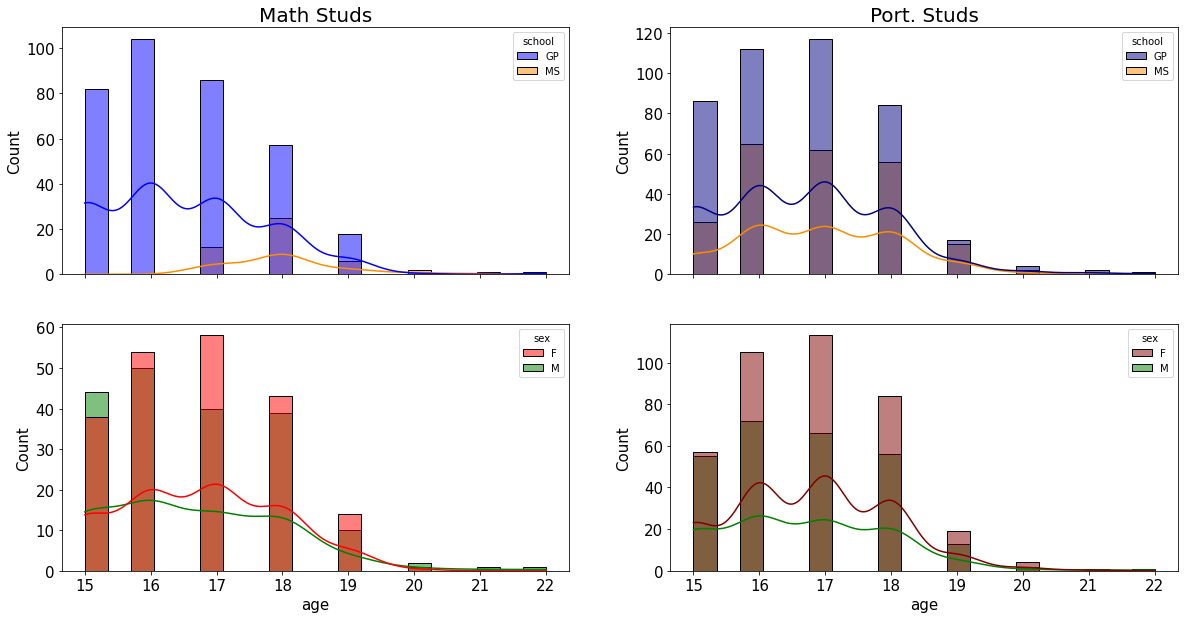

In [11]:
fig, axes =  plt.subplots(2,2, figsize = (20,10), sharex=True)

sns.histplot(data = mat_stud, x =  'age', hue = 'school', kde=True, bins=20, palette=school_colors[:2], ax=axes.flat[0])
sns.histplot(data = por_stud, x =  'age', hue = 'school', kde=True, bins=20, palette=school_colors[2:], ax=axes.flat[1])

sns.histplot(data = mat_stud, x =  'age', hue = 'sex', kde=True, bins=20, palette=sex_colors[:2], ax=axes.flat[2])
sns.histplot(data = por_stud, x =  'age', hue = 'sex', kde=True, bins=20, palette=sex_colors[2:], ax=axes.flat[3])


axes.flat[0].set_title('Math Studs', fontsize=20)
axes.flat[1].set_title('Port. Studs', fontsize=20)

for ax in axes.flat:
    ax.tick_params(labelsize=15)
    ax.yaxis.label.set_size(15)
    ax.xaxis.label.set_size(15)

plt.show()


Distribution are divided by schools and gender, as before. However, no particular differences are noted or particular strange things. Only few students have more than 18 years that is the normal age in which portuguese students finish secondary education.

### 2.3

### Function definition: horizontal stacked bars

The following functions are defined to easily plots annotated stacked bars. 

The main goals are:
* compare **features** contained in the two datsets (**dataframe1** and **dataframe2**)
* distinguish those features by a **column** (sex or school as before) using a stacked bar

In [12]:
'''Function to annotate bars.'''

def annotate_stackedbars(hbar):
    for p in hbar.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        hbar.text(x+width/2, y+height/2, '{:.0f}'.format(width),size=15, color='white', 
                  horizontalalignment='center', verticalalignment='center')

In [13]:
#datframe1: math_stud
#datframe2: por_stud
#column: feature used to distinguish (sex or school)
#features: subset of features to plot
#title
#colors: school_colors or sex_colors


def plot_hbars(dataframe1, dataframe2, column, features, title, colors):
    
    #dinamic definition of plot dimensions
    rows=ceil(len(features)/2)
    fig, axes = plt.subplots(rows,4, figsize=(15, rows*3))
    fig.tight_layout(pad=2.5)
    
    #for easier iteration
    plots = axes.flat    
           
    #iterating of the features and over the axes two by two
    for feature, i in zip(features, range(0,len(plots),2)):
        
        '''Considering that plot contains always four columns:
        They can be considered as two couples, each one with a left chart and a right chart.'''
        
        ax1 = plots[i] #subplot on the left
        ax2 = plots[i+1] #asubplot on the right
        
        #set a copy of the dataframe only with the needed features
        df = dataframe1[[column, feature]].copy()        
        #get 0 and 1 for creating stacked bars
        df = pd.get_dummies(df, prefix='', prefix_sep='', columns=[column])        
        #plot first bars on the left
        hbar1 = df.groupby(by=feature).sum().plot.barh(stacked=True, ax= ax1, color=colors[:2], legend=False)

        #same for the second dataframe, bar plotted on the right
        df = dataframe2[[column, feature]].copy()
        df = pd.get_dummies(df, prefix='', prefix_sep='', columns=[column])
        hbar2=df.groupby(by=feature).sum().plot.barh(stacked=True, ax=ax2, color=colors[2:], legend=False)
        
        
        #set labels and ticks
        ax1.set_yticks([])
        ax1.set_ylabel(feature, fontsize=18) #y label is kept only on the left, but it is common
        ax2.tick_params(axis='y', labelsize=14) #y ticks are kept only on the right, but they are common
        ax2.set_ylabel(None)
        
        ax1.set_xticks([])
        ax2.set_xticks([])
    
        #call function to annotate the bars
        annotate_stackedbars(hbar1)
        annotate_stackedbars(hbar2)

    #set subplots titles
    for i in range(4):
        if (i == 0 or i == 2):
            plots[i].set_title('Math Studs', fontsize=15)
        else:
            plots[i].set_title('Port. Studs', fontsize=15)
    
    #set legend position
    plots[0].legend(bbox_to_anchor=(0.5, 1.35), loc='lower left')
    plots[1].legend(bbox_to_anchor=(-0.25, 1.35), loc='lower left')
    
    #set overall title
    overall_title = fig.suptitle(title, fontsize=18)
    overall_title.set_y(1)

    # shift subplots down
    fig.subplots_adjust(top=0.9)

*Note that the features are named equally in the two datasets: 
so, for example, features A from math dataset is plotted beside feature A from portugues dataset, to compare them. So, the 4 subplots of each column should be analyzed two by two.*

### 2.4

### Features About Families and Parents

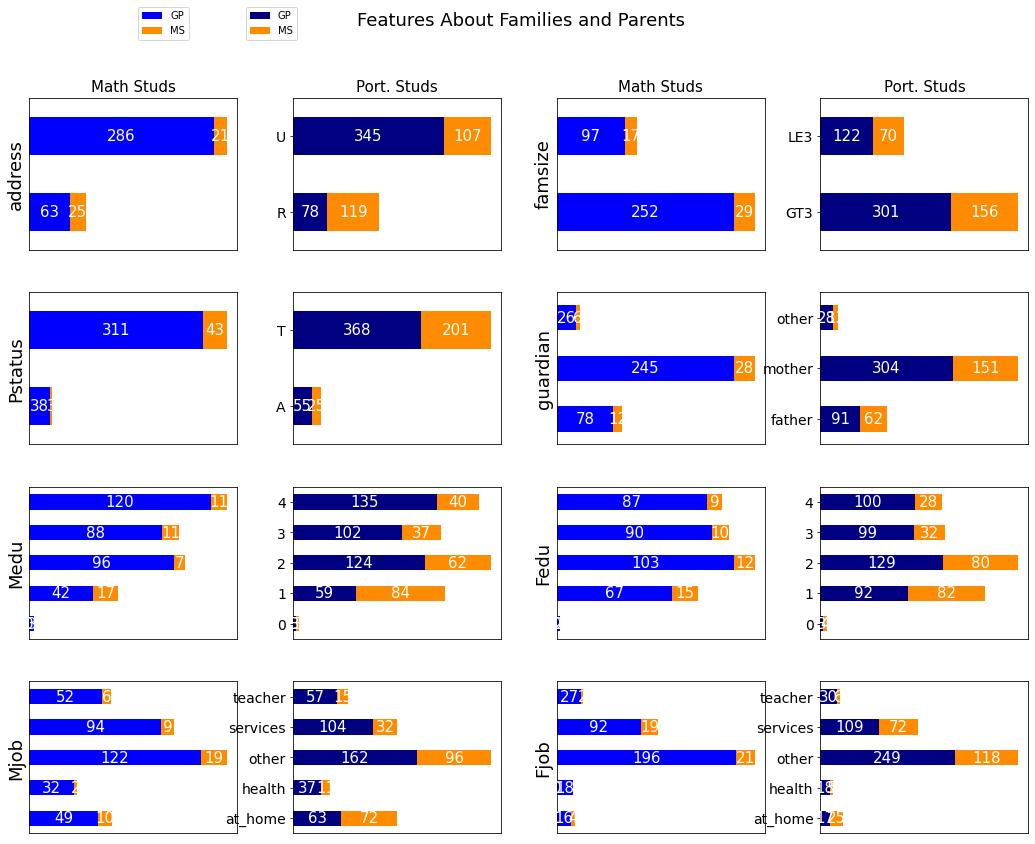

In [14]:
family_features = ['address', 'famsize', 'Pstatus', 'guardian', 'Medu', 'Fedu', 'Mjob', 'Fjob']

plot_hbars(mat_stud, por_stud, 'school', family_features, 'Features About Families and Parents', school_colors)

### 2.5

### Subject Related Features

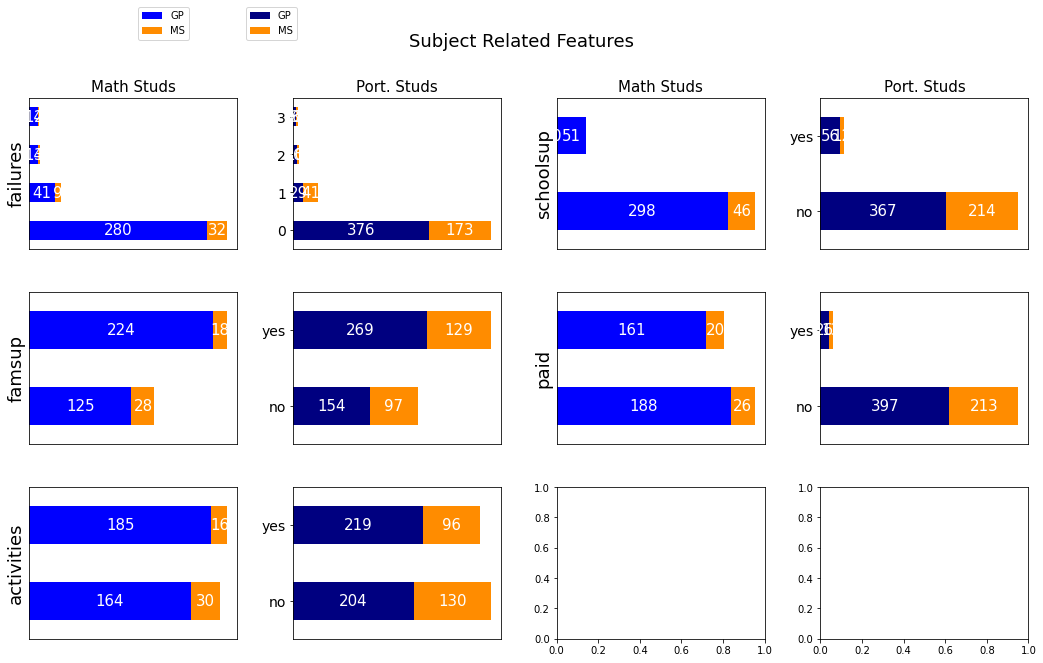

In [15]:
subject_features = ['failures', 'schoolsup', 'famsup', 'paid', 'activities']

plot_hbars(mat_stud, por_stud, 'school', subject_features , 'Subject Related Features',school_colors)

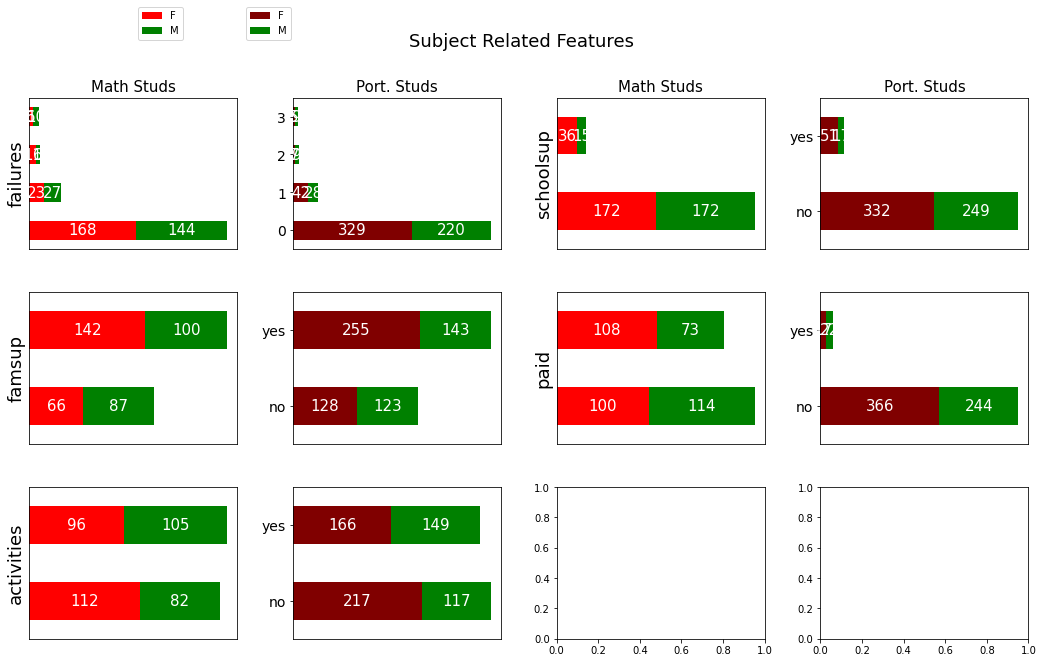

In [16]:
plot_hbars(mat_stud, por_stud, 'sex', subject_features , 'Subject Related Features', sex_colors)

As visible in the past two plots: more than half of math students get paid lessons after school, while almost none of portuguese students.

### 2.6

### Students Related Features

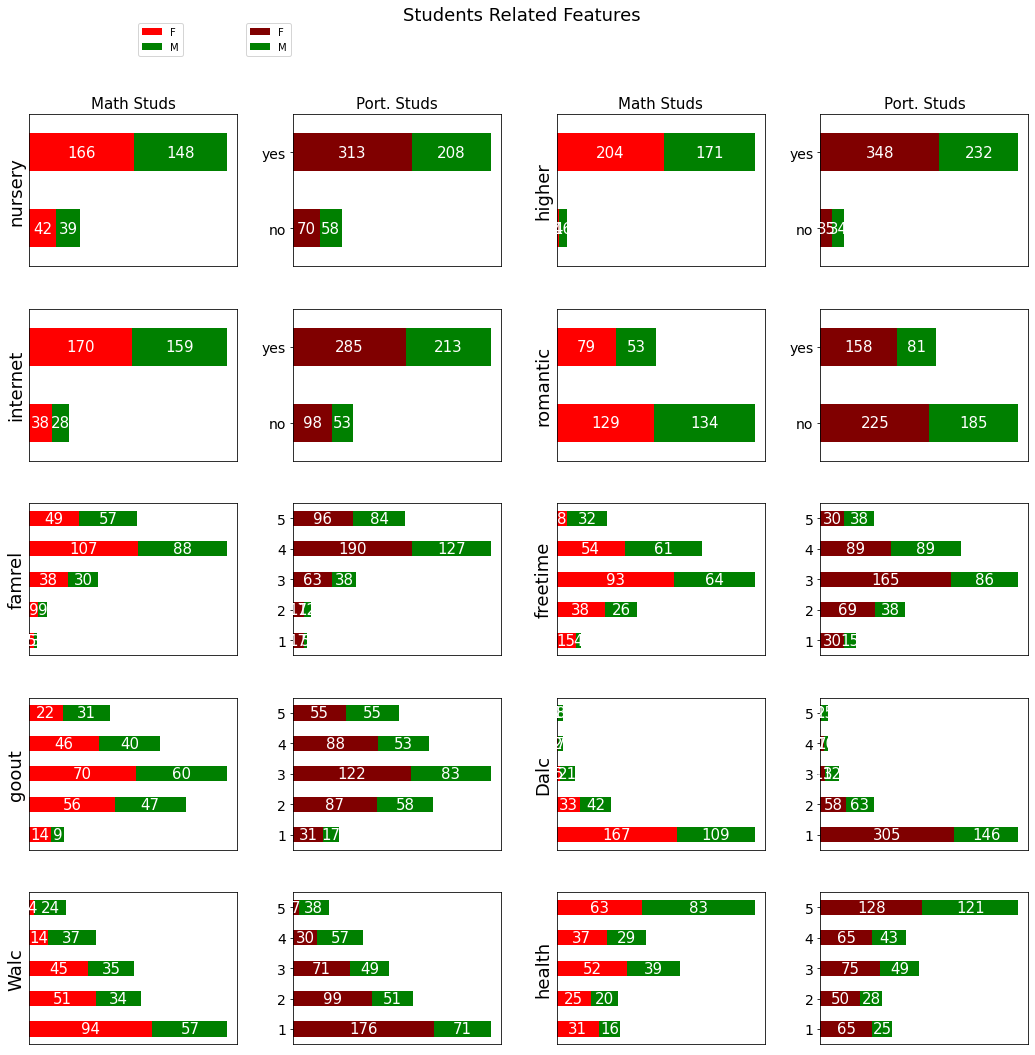

In [17]:
studs_features = ['nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health']
plot_hbars(mat_stud, por_stud, 'sex', studs_features , 'Students Related Features', sex_colors)

In general, from these first sets of graphs we canno't really see great differences in the two datasets. Also, so far the distinctions between schools and genders don't show particular patterns or differences.

### 2.7

### Absences distribution

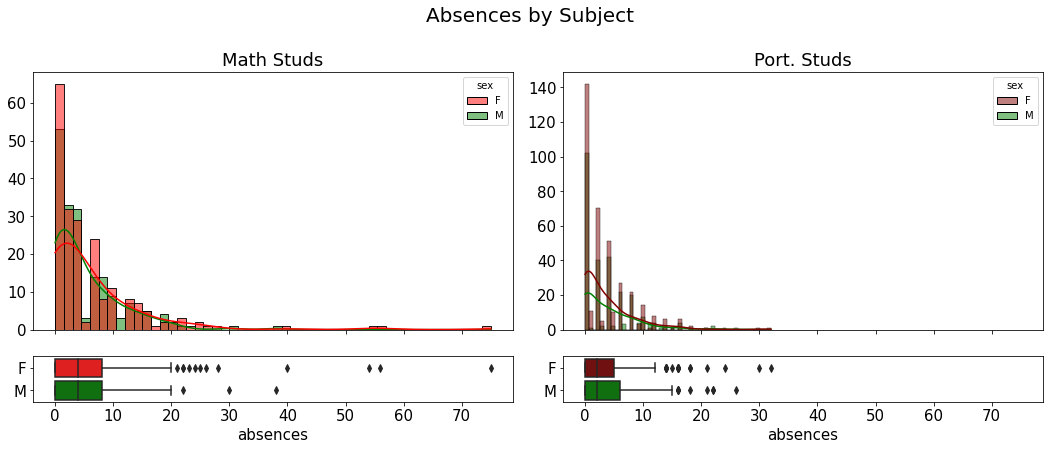

In [18]:
#two plots: age distribution and corresponding boxplots below

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize = (15,6), sharex=True,
                         gridspec_kw={'height_ratios': (.85, .15)})
fig.tight_layout(pad=2)

sns.histplot(data = mat_stud, x =  'absences', hue = 'sex', bins=50, kde=True, palette = sex_colors[:2], ax = ax1)
sns.boxplot(data = mat_stud, x = 'absences', y = 'sex', orient = 'h', palette = sex_colors[:2], ax = ax3)

sns.histplot(data = por_stud, x =  'absences', hue = 'sex', bins=50, kde=True, palette = sex_colors[2:], ax = ax2)
sns.boxplot(data = por_stud, x = 'absences', y = 'sex', orient = 'h', palette = sex_colors[2:], ax = ax4)

#setting titles and adjusting labels
ax1.set_title('Math Studs', size=18)
ax2.set_title('Port. Studs', size=18)


for ax in [ax1,ax2,ax3,ax4]:
    ax.set_ylabel(None)
    ax.tick_params(labelsize=15)
    ax.xaxis.label.set_size(15)

#set overall title
overall_title = fig.suptitle('Absences by Subject', fontsize=20)
overall_title.set_y(1)

# shift subplots down
fig.subplots_adjust(top=0.85)

plt.show()

Section 2 showed that there are not particular or notable differences between the two datasets (not counting students grades that will be analyzed in section 3).

## 3

## Math and Portuguese Grades 

In this section grades are analyzed and visualized more in detail.

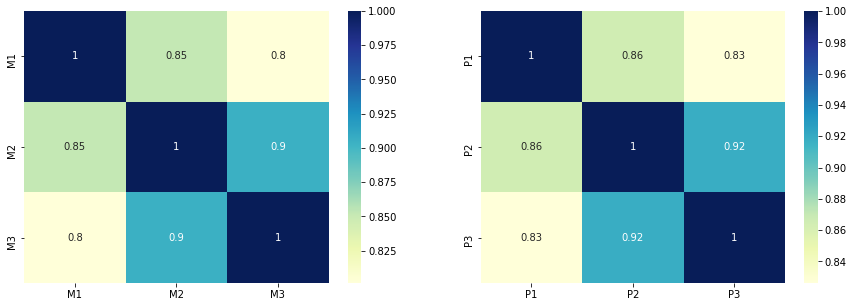

In [19]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))

sns.heatmap(mat_stud[['M1', 'M2', 'M3']].corr(), annot=True, cmap="YlGnBu",ax=ax1)
sns.heatmap(por_stud[['P1', 'P2', 'P3']].corr(), annot=True, cmap="YlGnBu",ax=ax2)

plt.show()

As one could expect, grades of first and second period and final grade are positive linearly correlated. Both for math and portuguese: in general if a student gets good grade in the first period, also get good grade in the second and final grade.

This is also shown from the pairplots below.

### 3.1

### Math

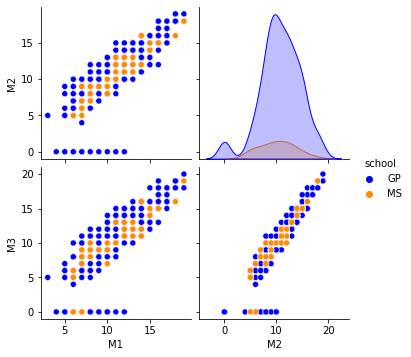

In [20]:
sns.pairplot(mat_stud, x_vars=['M1', 'M2'], y_vars = ['M2', 'M3'], hue = 'school', palette=school_colors[:2])

plt.show()

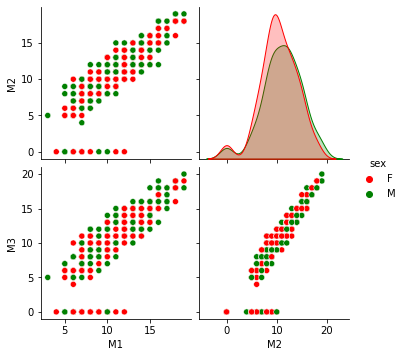

In [21]:
sns.pairplot(mat_stud, x_vars=['M1', 'M2'], y_vars = ['M2', 'M3'], hue = 'sex', palette=sex_colors[:2])
plt.show()

* The linear correlation is clearly showed. 
* We can also see that, a bunch of students that got grades > 0 in period 1 and/or period 2 got 0 as final grade. They mainly come from 'GP' school and are females.

### 3.2

### Portuguese

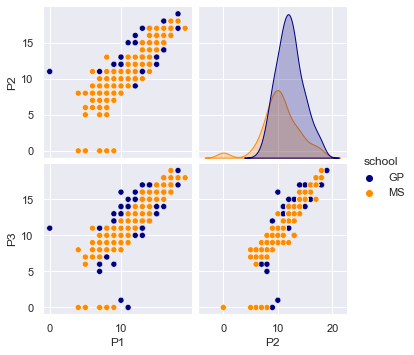

In [22]:
sns.set(rc={'figure.figsize':(10,10)})
sns.pairplot(por_stud, x_vars=['P1', 'P2'], y_vars = ['P2', 'P3'], hue = 'school', palette=school_colors[2:])
plt.show()

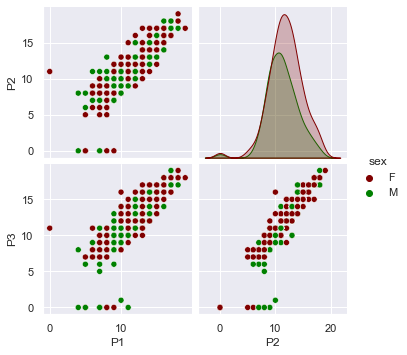

In [23]:
sns.set(rc={'figure.figsize':(10,10)})
sns.pairplot(por_stud, x_vars=['P1', 'P2'], y_vars = ['P2', 'P3'], hue = 'sex', palette=sex_colors[2:])
plt.show()

* The linear correlation is clearly showed.
* We can also see that, a bunch of students that got grades > 0 in period 1 and/or period 2 got 0 as final grade. This time, they mainly come from 'MS' school.

### 3.3

### Common students

As indicated, 382 students are common in the two datasets. These students can be identified by searching for identical attributes that characterize each student in some so-called 'common columns'.

In [24]:
common_columns = ["school","sex","age","address","famsize","Pstatus",
                  "Medu","Fedu","Mjob","Fjob","reason","nursery","internet"]

#merging the two dfs on the common columns
common_stud = mat_stud.merge(por_stud, on = common_columns, how = 'inner')

print(common_stud.columns)
print(common_stud.shape)
common_stud.head(2)

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian_x', 'traveltime_x', 'studytime_x',
       'failures_x', 'schoolsup_x', 'famsup_x', 'paid_x', 'activities_x',
       'nursery', 'higher_x', 'internet', 'romantic_x', 'famrel_x',
       'freetime_x', 'goout_x', 'Dalc_x', 'Walc_x', 'health_x', 'absences_x',
       'M1', 'M2', 'M3', 'guardian_y', 'traveltime_y', 'studytime_y',
       'failures_y', 'schoolsup_y', 'famsup_y', 'paid_y', 'activities_y',
       'higher_y', 'romantic_y', 'famrel_y', 'freetime_y', 'goout_y', 'Dalc_y',
       'Walc_y', 'health_y', 'absences_y', 'P1', 'P2', 'P3'],
      dtype='object')
(382, 53)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel_y,freetime_y,goout_y,Dalc_y,Walc_y,health_y,absences_y,P1,P2,P3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11


### 3.3.1

### Heads up: possible mistakes in the datasets

It is normal that not all features are equal for the same student in the two dataset:
for example, a student can need paid support in math but not in portuguese.

However, other features don't really have reasons to be different: travel time from home to school shouldn't be different, for instance.

Features that are not 'common' (different for the same student in the two datasets) now present a suffix ('_x' or '_y') after the merge. These features are compared and differences shown.

In [25]:
x_l = ['guardian_x',
 'traveltime_x',
 'higher_x',
 'romantic_x',
 'famrel_x',
 'freetime_x',
 'goout_x',
 'Dalc_x',
 'Walc_x',
 'health_x']

y_l =['guardian_y',
 'traveltime_y',
 'higher_y',
 'romantic_y',
 'famrel_y',
 'freetime_y',
 'goout_y',
 'Dalc_y',
 'Walc_y',
 'health_y']


#for readability the features order is re-organized
subset=[]
for x,y in zip(x_l, y_l):
    subset.append(x)
    subset.append(y)
    
subset

['guardian_x',
 'guardian_y',
 'traveltime_x',
 'traveltime_y',
 'higher_x',
 'higher_y',
 'romantic_x',
 'romantic_y',
 'famrel_x',
 'famrel_y',
 'freetime_x',
 'freetime_y',
 'goout_x',
 'goout_y',
 'Dalc_x',
 'Dalc_y',
 'Walc_x',
 'Walc_y',
 'health_x',
 'health_y']

In [26]:
#creating a copy of the dataframe keeping only the subset
sb = common_stud[subset].copy()

In [27]:
#printing all rows that present a difference
for i in range(0,len(subset),2):
    print('**************************************************************************************************************')
    print(subset[i],subset[i+1])
    print('**************************************************************************************************************')
    print(sb[sb.iloc[:,i] != sb.iloc[:,i+1]])

**************************************************************************************************************
guardian_x guardian_y
**************************************************************************************************************
    guardian_x guardian_y  traveltime_x  traveltime_y higher_x higher_y  \
111     father     mother             1             1      yes      yes   
112     mother     father             1             1      yes      yes   
122     father     mother             1             1      yes       no   
123     mother     father             1             1       no      yes   
280     mother     father             2             1      yes      yes   
281     father     mother             1             2      yes      yes   

    romantic_x romantic_y  famrel_x  famrel_y  freetime_x  freetime_y  \
111         no        yes         5         4           3           2   
112        yes         no         4         5           2           3   
122        

As anticipated, some inconsinstencies have been noted. For instance, for the same student in one dataset is indicate that the guardian is the father while in the other dataset, the guardian is the mother.

In other cases, a student is in a romantic relation in the math class, but single in the portuguese class. These inconsistencies may be mistakes in the data collection.

### 3.3.2

### Relation between math and portuguese grades

Math and portuguese grades, of the students that are in both datasets, are compared.

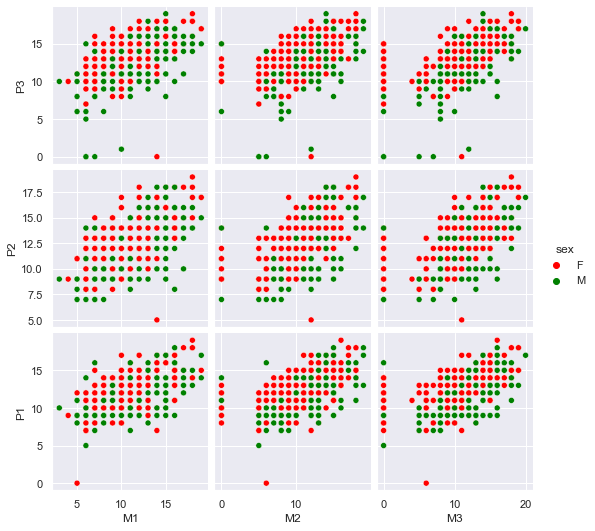

In [28]:
sns.pairplot(common_stud, x_vars=['M1', 'M2','M3'], y_vars = ['P3', 'P2','P1'], hue = 'sex', palette=sex_colors[:2])
plt.show()

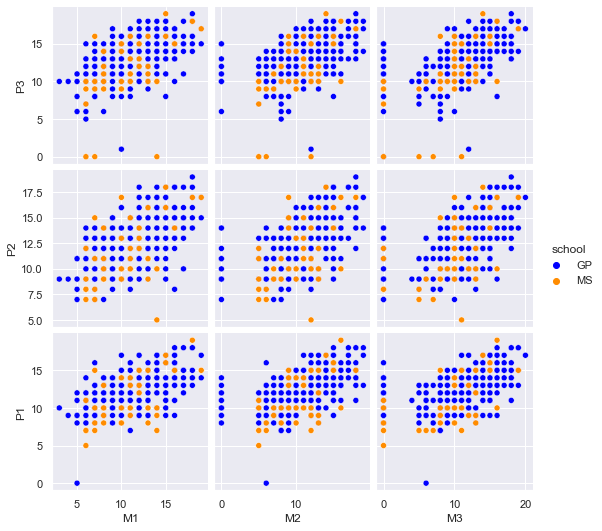

In [29]:
sns.pairplot(common_stud, x_vars=['M1', 'M2','M3'], y_vars = ['P3', 'P2','P1'], hue = 'school', palette=school_colors[:2])
plt.show()

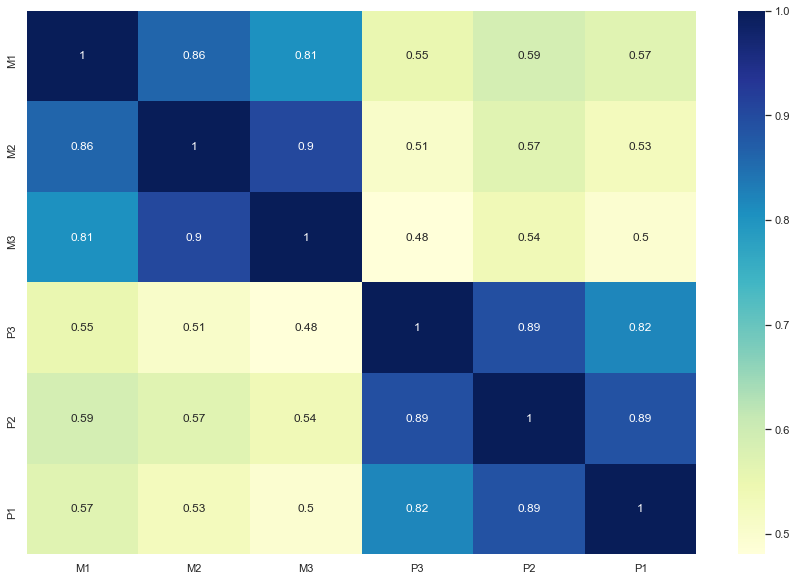

In [30]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(common_stud[['M1', 'M2', 'M3', 'P3', 'P2', 'P1' ]].corr(), annot=True, cmap="YlGnBu")
plt.show()

Math and Portuguese grades are correlated but **not in a strong way.** This makes sense, since we all know that some people could be more skilled or interested in scientific subjects or others can find math boring and difficult.

What this tell us, however, is that external factors (such as parents education or travel time to school) could be important but are not all. **The same student that got high grade in one subject could have got low grade in the other.**

**In general** the trend is linear though; **many students that have good/bad performances in math also have good/bad performances in portuguese.**

## 4

## Features correlated with school performances

After having had a sense of what is in the datasets, in this section and in section number 5 some "social insights" are procured. In particular:
* in section 4 it is investigated about main features correlated with students performances
* in section 5 it is investigated about main features correlated with alchool consumption

To a have a first sense of correlations, heatmaps are plotted below.

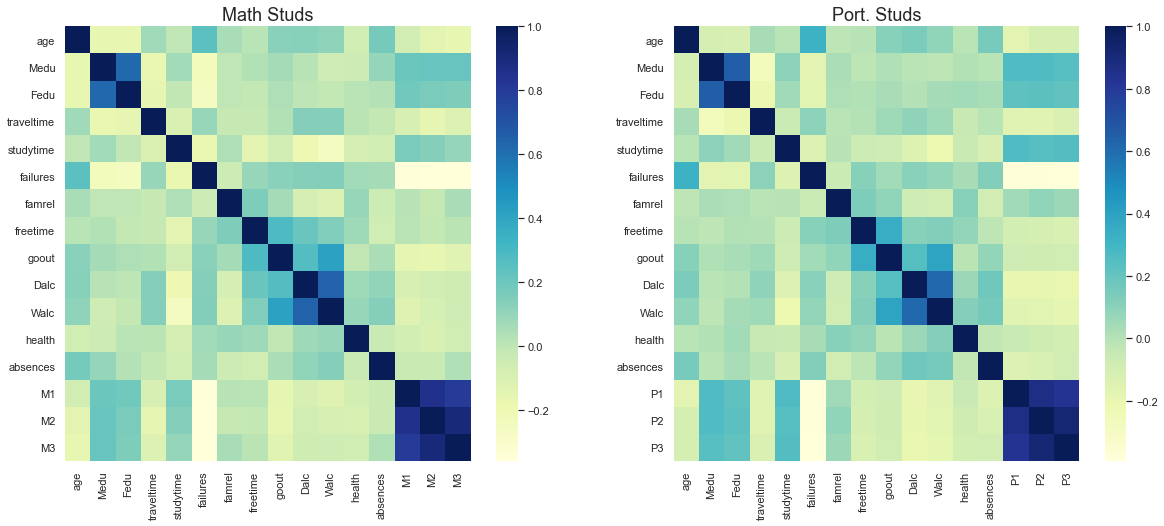

In [31]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))

sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(mat_stud.corr(), cmap="YlGnBu", ax=ax1)
sns.heatmap(por_stud.corr(), cmap="YlGnBu", ax=ax2)

ax1.set_title('Math Studs', size=18)
ax2.set_title('Port. Studs', size=18)

plt.show()

Again, heatmpas are very similar, indicating that correlations between variables are likely the same.
For this reason, from now on, it will be analyzed more in detail the portoguese dataset, assuming that condiserations done will be similar for both datasets.

Moreover the Machine Learning analysis will be performed on the port. dataset, so it's more of interest explore that.

In general, we can say that students have good performances if they:
* get good grades
* go regularly to school, having low number of absences
* don't fail classes (0 failures)

These features are investigated below.

### 4.1

### Parents education/job and grades

In [32]:
'''The following function is defined, and will be used many times later on.
The scope is to create scatter plots for categorical variables (stripplot),
in a fast and modulable way.'''

def scatter_catvar(df, catvars, y, hue, rows, columns, figsize):
    
    fig, axes = plt.subplots(rows,columns, figsize=figsize)

    for ax, x in zip(axes.flat, catvars):
        sns.stripplot(data=df,x=x, y=y, hue=hue, ax=ax)

    plt.show()

First, the parents influence on students grades is investigated. 

Do the education level and job of mother and father influences grades? Do more educated parents help more their children leading to better grades?

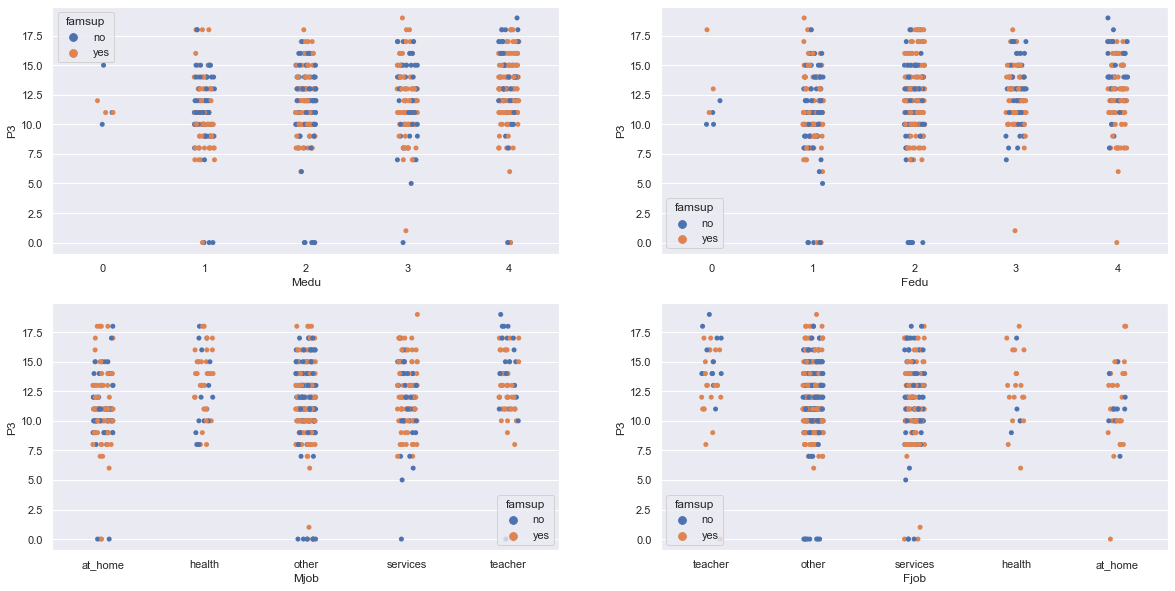

In [33]:
scatter_catvar(por_stud, ['Medu', 'Fedu', 'Mjob', 'Fjob'], 'P3', 'famsup', 2, 2, (20,10))

Grades distribution is quite uniform, a marked trend is not visible.

### 4.2

### (study/free) time and grades

Something that could influence students performance is certainly how they manage their time: how much time they spend studying or if they have to travel many hours per day having less free time and study time.

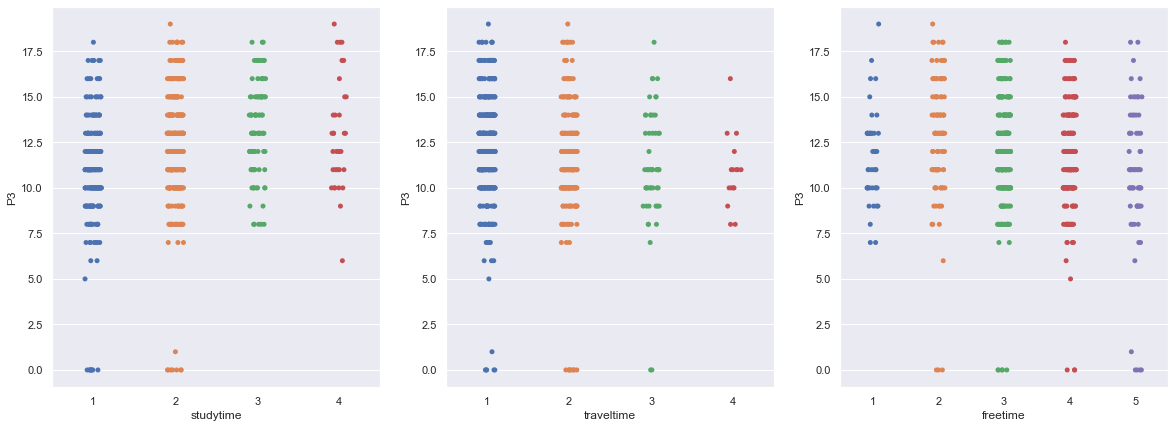

In [34]:
scatter_catvar(por_stud, ['studytime', 'traveltime', 'freetime'], 'P3', None, 1, 3, (20,7))


Again, a marked trend is not visible. **However, it seems that students that have to travel many hours per day hardly reach high grades.**

Also fewer students that study 3/4 hours per day get grades below 10 (fail the subject).

### 4.3

### Support vs grades

External support can improve students grades. Let's check this hypotesis.

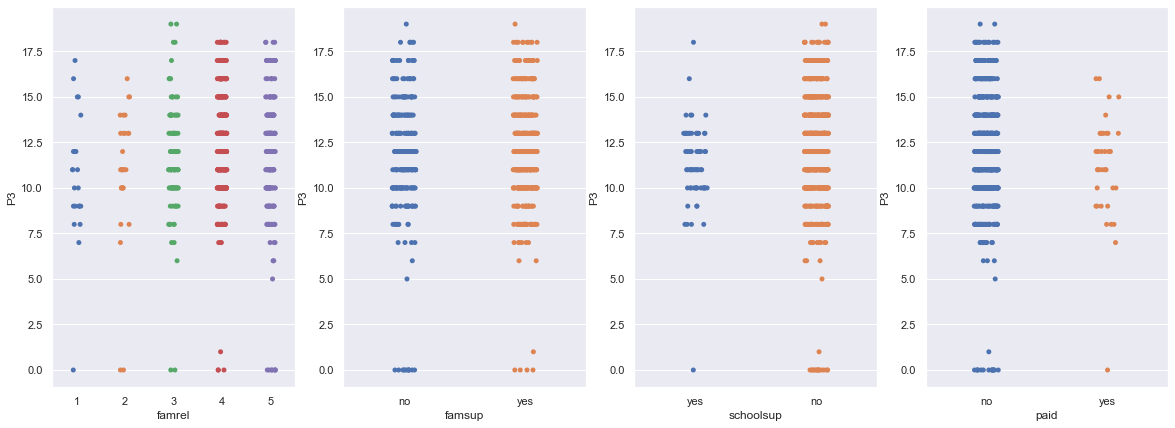

In [35]:
scatter_catvar(por_stud, ['famrel', 'famsup', 'schoolsup', 'paid'], 'P3', None, 1, 4, (20,7))

From the scatterplots it emerges that:
* students with bad relationships at home less likely reach high grades.
* no notable differences from students that receive family support to ones that do not
* students that receive school support or paid external support have worst performance. This kind of support may be a consequence and it is given to students with more difficulties.

### 4.4

### Alchool consumption and grades

Going out a lot and habitually consuming alchool, have a bad influence on performances?

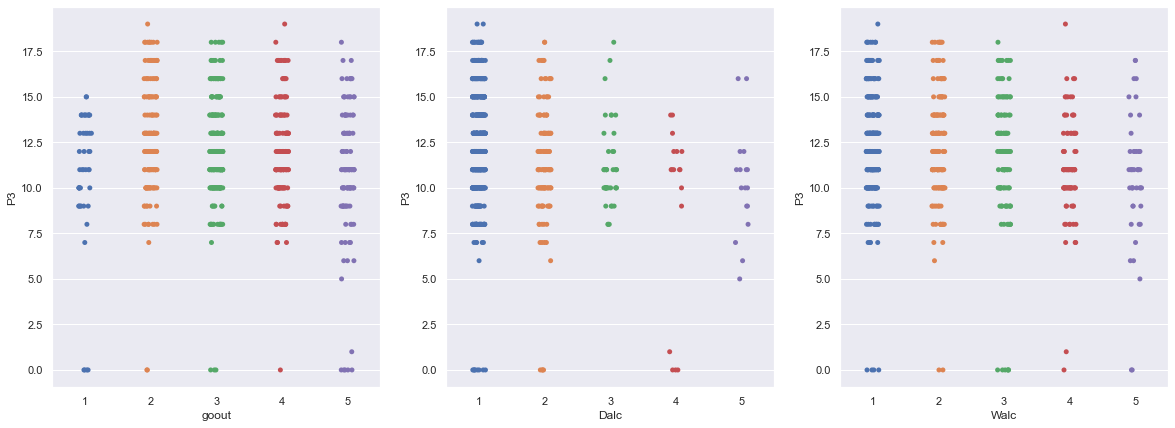

In [36]:
scatter_catvar(por_stud, ['goout', 'Dalc', 'Walc'], 'P3', None, 1, 3, (20,7))

Especially with focus on the second plot (Dalc is referred to alchool consume during the week --> 5 means high consumption):
* students with high alchool consumption during the week seem to have worst performances. Students with a Dalc of 4 or 5 hardly have grades above 12/13.
* students that do not go out much (goout = 1, first plot), don't have grades above 15. Are they more introvert students less prone to excel in humanistic subjects?

### 4.5

### Features correlated with failures

A good school performance indicator is the the number of failures. Several features are picked to verify their correlation with number of failures.

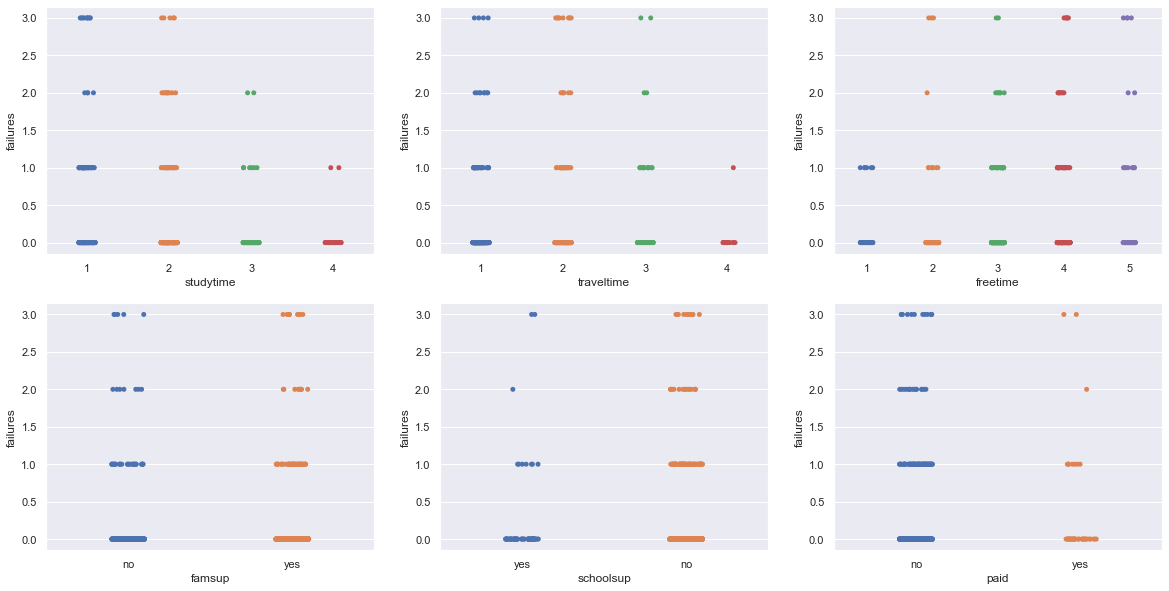

In [37]:
scatter_catvar(por_stud, ['studytime', 'traveltime', 'freetime', 'famsup', 'schoolsup', 'paid'],
               'failures', None, 2, 3, (20,10))


More absences can lead to more failures, at the same time students with many absences can get paid lessons to recover the time lost. Let's check plotting the data.

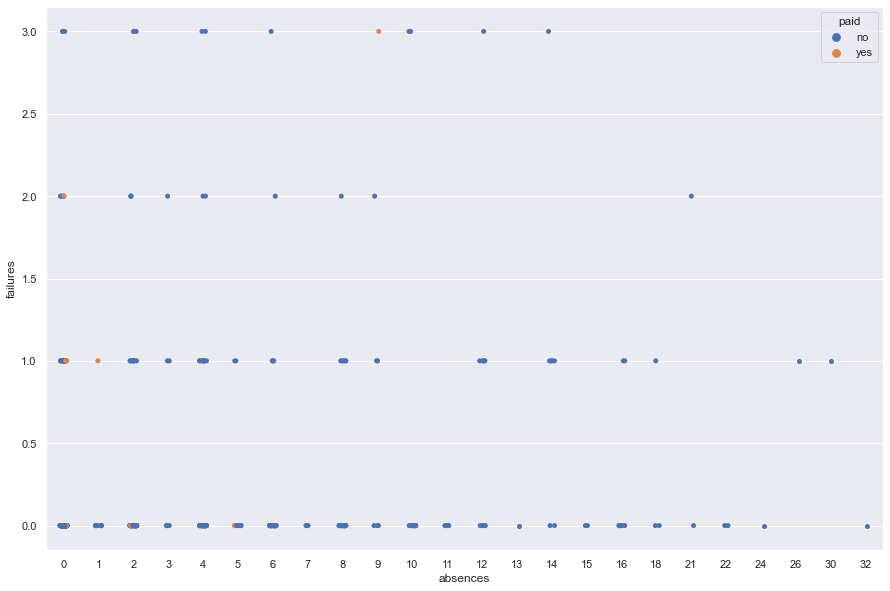

In [38]:
sns.stripplot(x='absences', y='failures', hue='paid', data=por_stud)
plt.show()

A non-supportive family enviroment can increase the likelihood of failures? At the same time, students in well educated families more likely do not fail their classes?

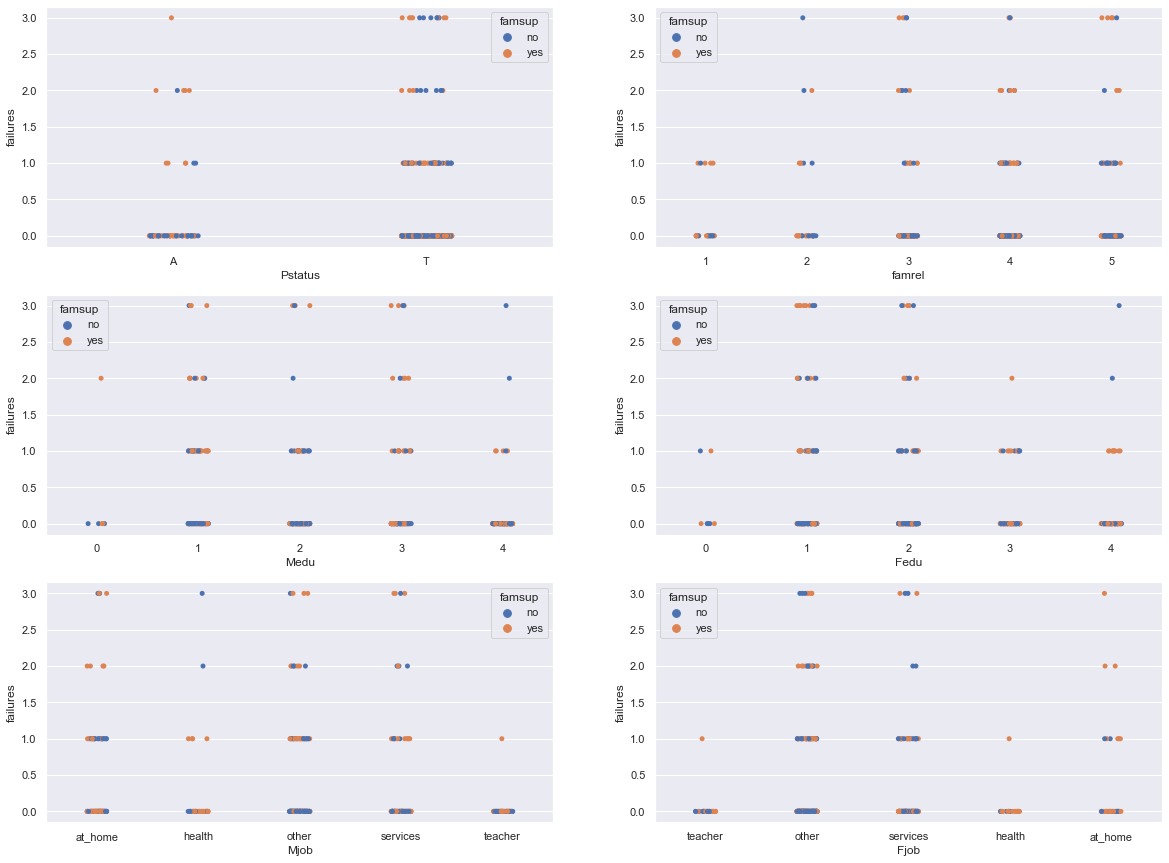

In [39]:
scatter_catvar(por_stud, ['Pstatus', 'famrel', 'Medu', 'Fedu', 'Mjob', 'Fjob'], 'failures', 'famsup', 3, 2, (20,15))

There aren't marked trends. So, it is quite difficult to reach conclusions from those plots.

### 4.6

### Features correlated with absences

The third school performance indicator is the number of absences. The first assumption we made is that students with bad health conditions make more absences than others.

C:\Users\david\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 20.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


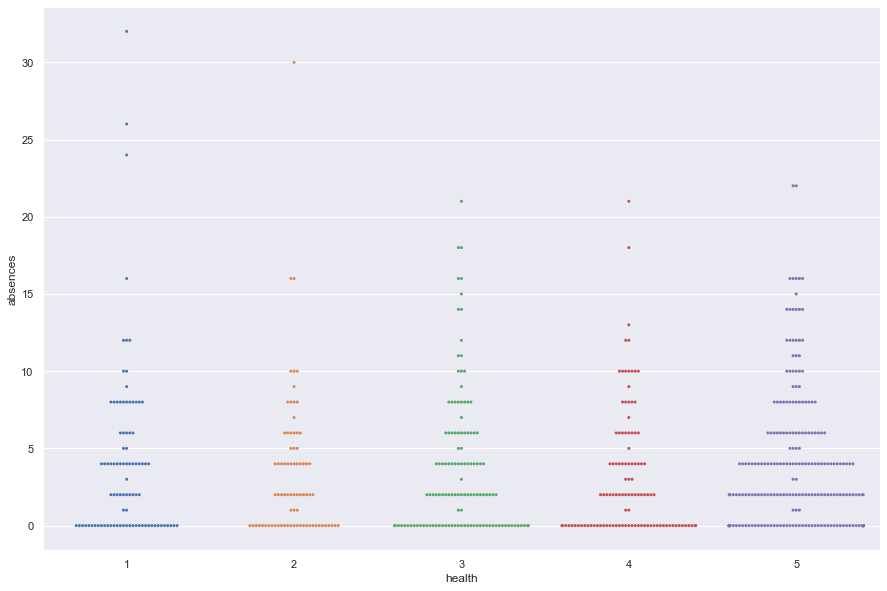

In [40]:
sns.swarmplot(x='health', y='absences', data=por_stud, size=3)
plt.show()

Students with bad health (1/2), in general, do not stay at home more than students with very good health (5), apart few cases with the highest number of absences. This means that the causes of students absences may be different to illness or health condition.

Then a question come spontaneus, do absences influence grades?

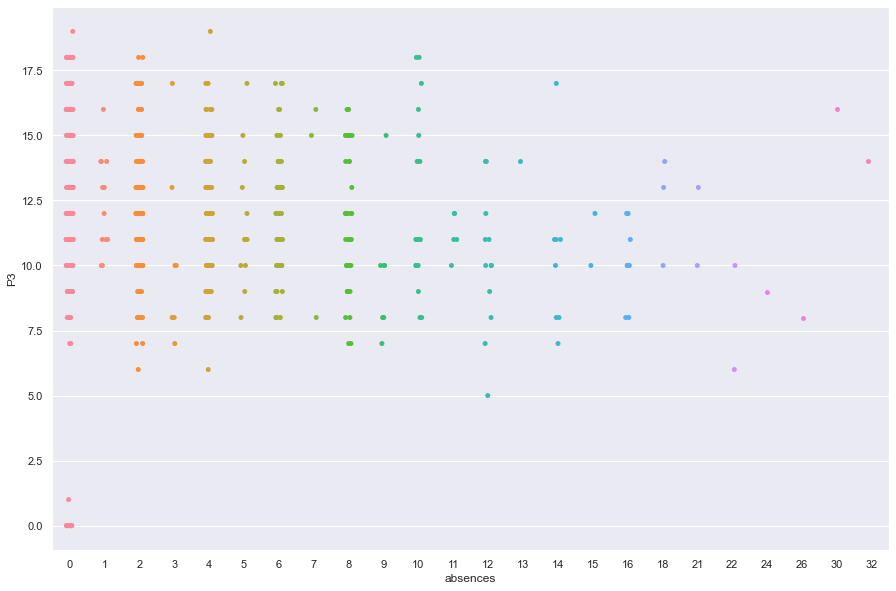

In [41]:
sns.stripplot(x='absences', y='P3', data=por_stud)
plt.show()

From the plot it seems that above 10 absences, it is very difficult for students get grades above 15.

#### Other features are plotted to verify trends 

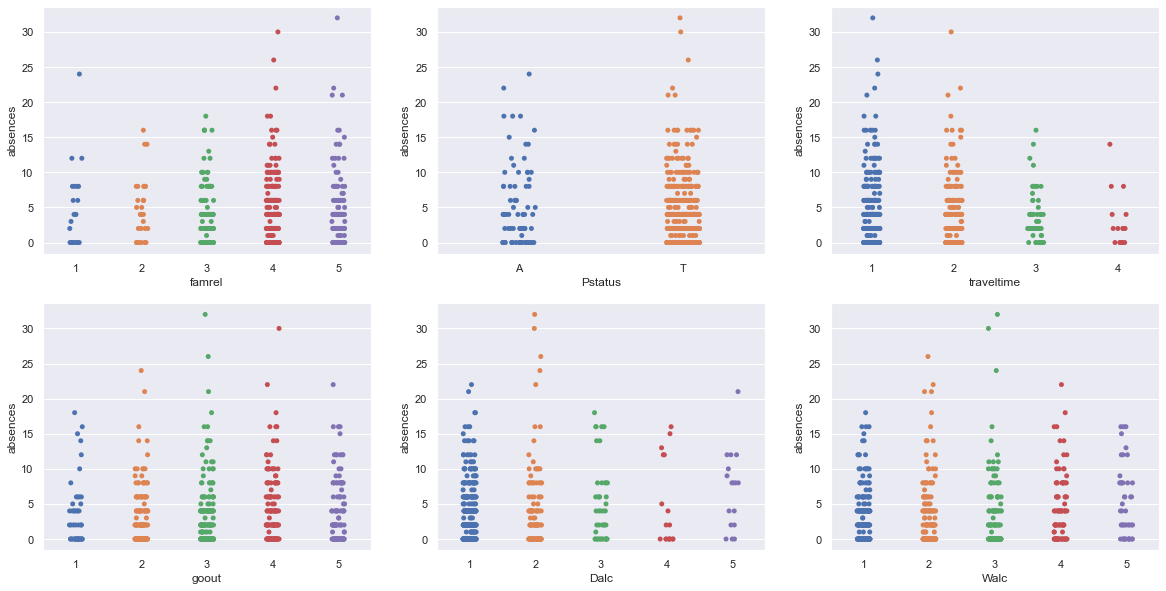

In [42]:
scatter_catvar(por_stud, ['famrel', 'Pstatus', 'traveltime', 'goout', 'Dalc', 'Walc'],
               'absences', None, 2, 3, (20,10))


The most interesting insight from this set of graphs is that students that live far from school (3-4 hours) are not more prone in doing more absences as one could expect.

## 5

## Features correlated with alchool consumption

Another important social consideration is to find features that influence or are just correlated with alchool consumption. 
First assumption is that students that go out the most also drinnk more. Let's check this hypothesis.

C:\Users\david\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 40.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\david\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 44.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\david\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 19.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\david\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 12.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\david\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 11.2% of the points

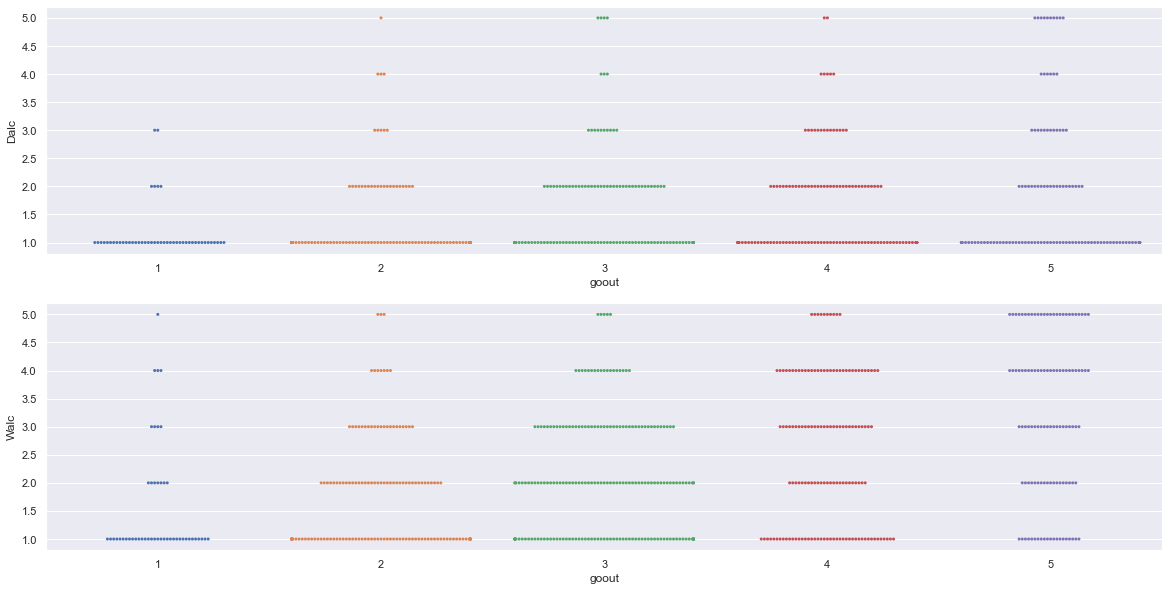

In [43]:
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(20,10))

sns.swarmplot(x='goout', y='Dalc', data=por_stud, ax=ax1, size=3)
sns.swarmplot(x='goout', y='Walc', data=por_stud, ax=ax2, size=3)

plt.show()

The assumption seems to be partially correct. Students that drink more (Dalc and Walc of 4/5) also generally go out a lot. There are also many other cases in which this correlation is not so marked. In general, students drink more alchool in the week end, as one could expect.

#### Drinking a lot of alchool during the week could be more problematic for underaged students. Let's investigate features that are more correlated with this behaviour.

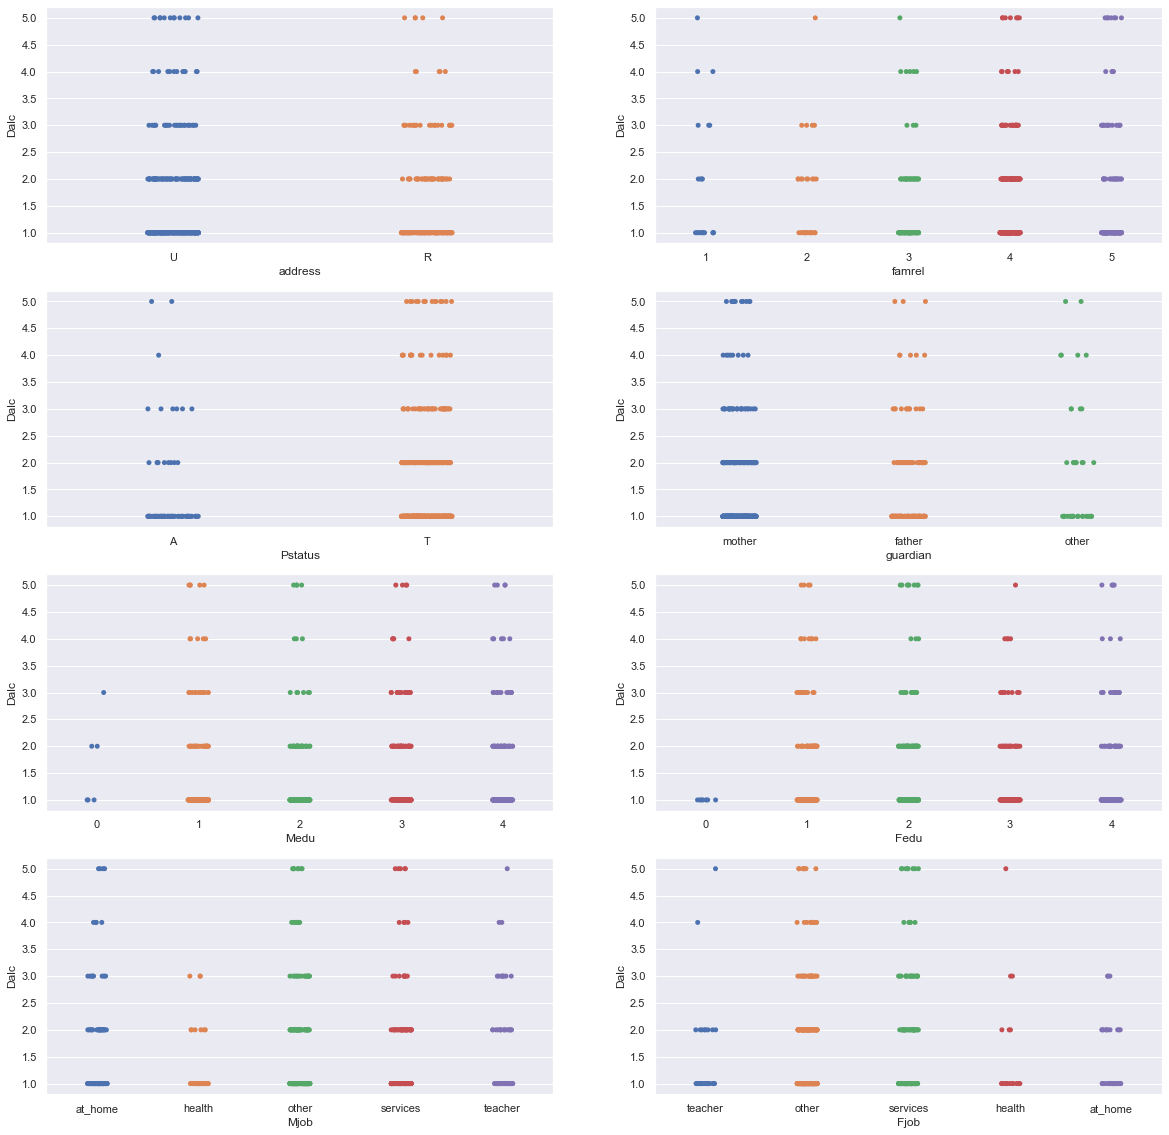

In [44]:
scatter_catvar(por_stud, ['address', 'famrel', 'Pstatus', 'guardian', 'Medu', 'Fedu', 'Mjob', 'Fjob'],
               'Dalc', None, 4, 2, (20,20))

Students that have parents working in healthcare or have the father that is a teacher or at home, seem to be less prone to alchool consumption during the week.

## 6

## EDA Conclusions

The EDA gave us a sense of the variables in the dataset and also revaling some interesting insights. We are now ready to pass to the Machine Learning analysis.